In [29]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')  

In [30]:
# Step 2: Load the dataset
df = pd.read_csv('day.csv')



In [31]:
# Step 3: Explore the dataset
print(df.head())
print(df.info())
print(df.describe())



   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [32]:
# Step 4: Preprocess the data
# Drop non-numeric and irrelevant columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)



In [33]:
# Check for missing values
print(df.isnull().sum())




season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [34]:
# Step 5: Perform multiple linear regression
# Define the dependent variable (y) and independent variables (X)
X = df.drop('cnt', axis=1)
y = df['cnt']



In [35]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     262.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          4.25e-243
Time:                        22:58:15   Log-Likelihood:                -5970.9
No. Observations:                 730   AIC:                         1.197e+04
Df Residuals:                     718   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1458.4924    239.649      6.086      0.0

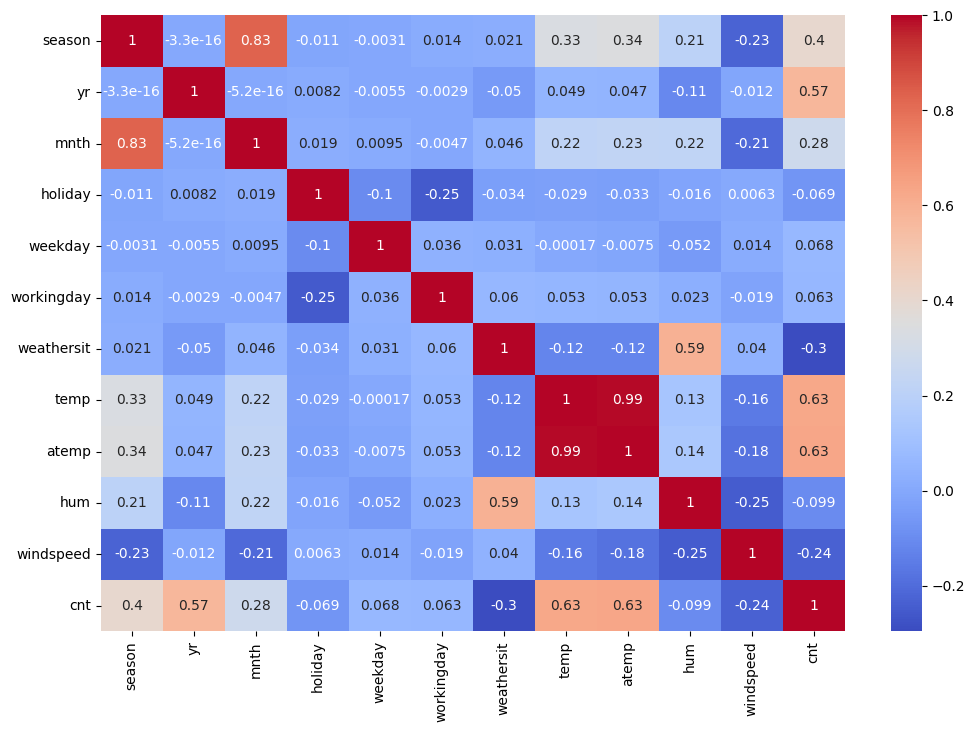

In [36]:
# Step 6: Analyze the results
print(model.summary())

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Conclusions :From the heatmap:
Strong positive or negative correlations are indicated by darker colours of blue or red, respectively, in the heatmap that displays the correlation between the variables. Some factors that are related to forecasting the demand for shared bikes (variable cnt) are as follows:

Important Factors Year (yr):

significant positive association (0.57) with cnt.
shows a discernible rise in the demand for bikes over time.

Temperature (temp and atemp):

There is a high positive association between both factors and cnt (0.63 each).
In general, more people ride bikes in warmer weather.

Season (season):

0.4 indicates a somewhat positive connection with cnt.
indicates that some seasons, such as spring or summer, have more demand.

Windspeed (windspeed):

cnt has a weakly negative correlation (-0.24).
suggests that strong wind speeds could marginally lower consumption.

The current weather conditions (weathersit):

cnt has a moderately negative correlation (-0.3).
Unfavourable weather conditions, such as rain or snow

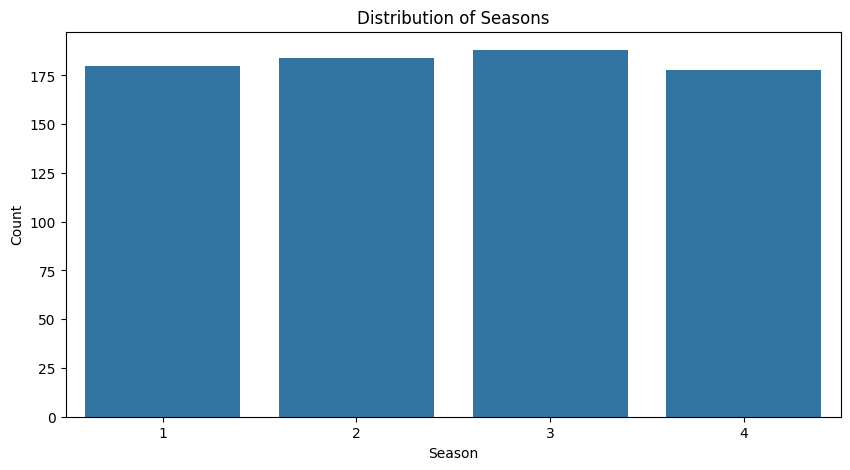

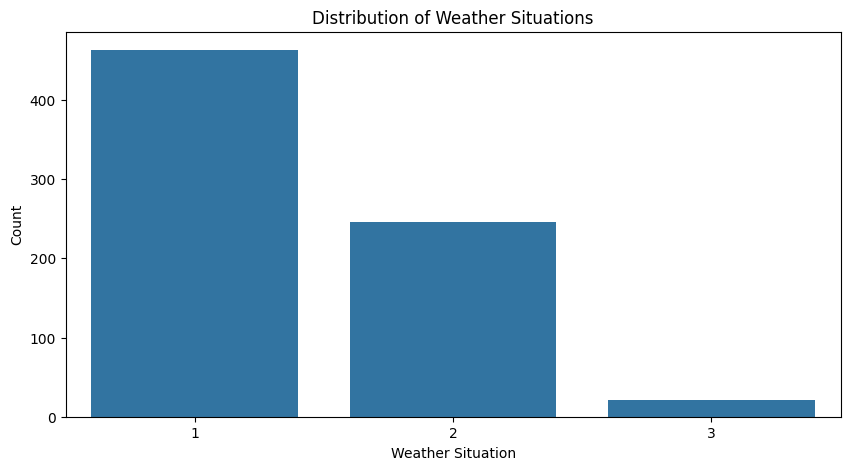

In [37]:
# Visualize the distribution of the 'season' variable
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of the 'weathersit' variable
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='weathersit')
plt.title('Distribution of Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()

In [38]:

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

# Convert boolean columns to integers (0 and 1)
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)


In [39]:
# checking with RFE and the feature evaluation

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

y_train = df_train.pop('cnt')
x_train = df_train

lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(x_train, y_train)
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

(510, 15)
(220, 15)


[('yr', np.True_, np.int64(1)),
 ('mnth', np.False_, np.int64(7)),
 ('holiday', np.True_, np.int64(1)),
 ('weekday', np.False_, np.int64(4)),
 ('workingday', np.False_, np.int64(2)),
 ('temp', np.False_, np.int64(3)),
 ('atemp', np.False_, np.int64(6)),
 ('hum', np.False_, np.int64(8)),
 ('windspeed', np.False_, np.int64(5)),
 ('season_2', np.True_, np.int64(1)),
 ('season_3', np.True_, np.int64(1)),
 ('season_4', np.True_, np.int64(1)),
 ('weathersit_2', np.True_, np.int64(1)),
 ('weathersit_3', np.True_, np.int64(1))]

In [40]:
#colmns that are given high priority

col = list(x_train.columns[rfe.support_])
col


['yr',
 'holiday',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_2',
 'weathersit_3']

In [41]:
x_train.columns[~rfe.support_]


Index(['mnth', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [42]:
col.extend(['temp', 'atemp', 'windspeed'])

In [43]:
#Creating X_test  dataframe with RFE selected variables

x_train_rfe = x_train[col]

# adding constant variable
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          4.68e-180
Time:                        22:58:15   Log-Likelihood:                -4146.3
No. Observations:                 510   AIC:                             8315.
Df Residuals:                     499   BIC:                             8361.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1054.1250    192.154      5.486   

In [44]:
#VIF
#significance of pvalues
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['vif'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF,vif
8,temp,57.813709,57.81
9,atemp,53.291493,53.29
0,const,27.305898,27.31
4,season_3,4.803895,4.80
3,season_2,2.539235,2.54
5,season_4,1.852031,1.85
10,windspeed,1.143154,1.14
7,weathersit_3,1.051433,1.05
6,weathersit_2,1.034684,1.03
1,yr,1.020128,1.02


In [45]:
x_train_new = x_train_rfe.drop(['const'], axis=1)

Text(0.5, 0, 'Errors')

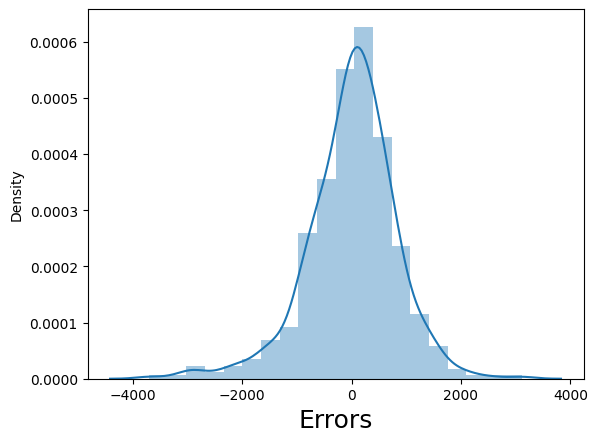

In [46]:
#Residual Analysis
y_train_pred = lm.predict(x_train_rfe)


fig = plt.figure()
sns.distplot(y_train-y_train_pred, bins=20)
plt.xlabel('Errors', fontsize=18)


In [47]:
y_test = df_test.pop('cnt')
x_test = df_test

In [48]:
x_test_new = x_test.copy()
x_test_new = sm.add_constant(x_test_new)
x_test_new = x_test_new[x_train_rfe.columns]
y_pred = lm.predict(x_test_new)


Text(0, 0.5, 'y_pred')

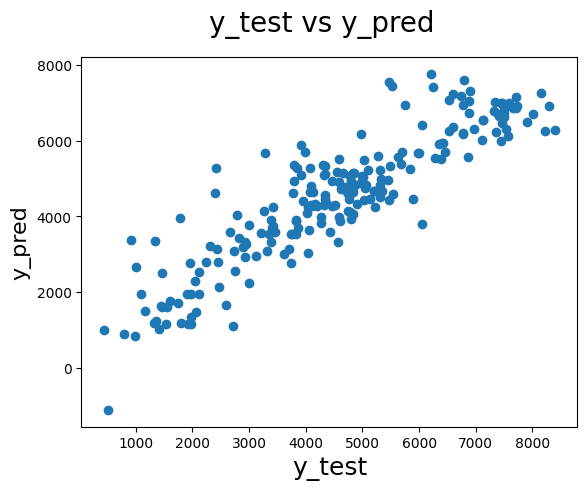

In [54]:
# Model evaluation

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [52]:
# Model Evaluation using R2 score:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8013481114203488